In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
%matplotlib inline
plt.style.use('ggplot')


from simulation.analyse import get_win_probabilities, get_simulations
from features.data_provider import get_feature_columns, get_whole_dataset, set_feature_columns
from models.score_model import get_model
from simulation.predictor import MaxProbabilityScorePredictor
from simulation.simulation import run_simulation, run_actual_tournament_simulation
from db.simulation_table import get_simulation_results, delete_all

from notebook_helpers import plot_bank_and_bets, run_unit_strategy, run_kelly_strategy

In [16]:
home = get_whole_dataset("home_score", filter_start="2014-06-12", filter_end="2016-06-12")
away = get_whole_dataset("away_score", filter_start="2014-06-12", filter_end="2016-06-12")
X = pd.concat([home[0], away[0]])
y = pd.concat([home[1], away[1]])
model = get_model(X=X, y=y, n_estimators=5000)
predictor = MaxProbabilityScorePredictor(model)

In [17]:
tournament_template = pd.read_csv('data/original/wc_2018_games_real.csv')
run_actual_tournament_simulation(tournament_template, predictor)
tournament_simulation = get_simulation_results()
tournament_simulation["true_outcome"] = np.sign(tournament_simulation["home_score"] - tournament_simulation["away_score"])
delete_all()

print("Accuracy:", sum(tournament_simulation["outcome"] == tournament_simulation["true_outcome"]) / tournament_template.shape[0])
tournament_simulation

Accuracy: 0.5625


,id,match_id,date,home_team,away_team,home_score,away_score,outcome,home_win_prob,draw_prob,away_win_prob,true_outcome
0,129,0,2018-06-14,Russia,Saudi Arabia,5,0,1,0.450664,0.263494,0.285841,1
1,130,1,2018-06-15,Egypt,Uruguay,0,1,-1,0.213278,0.255910,0.530811,-1
2,131,2,2018-06-15,Morocco,IR Iran,0,1,1,0.462549,0.267339,0.270112,-1
3,132,3,2018-06-15,Portugal,Spain,3,3,-1,0.271974,0.264013,0.464012,0
4,133,4,2018-06-16,France,Australia,2,1,1,0.751213,0.164717,0.084043,1
5,134,5,2018-06-16,Argentina,Iceland,1,1,1,0.676815,0.196262,0.126912,0
6,135,6,2018-06-16,Peru,Denmark,0,1,-1,0.327071,0.284374,0.388554,-1
7,136,7,2018-06-16,Croatia,Nigeria,2,0,1,0.504640,0.255588,0.239771,1
8,137,8,2018-06-17,Costa Rica,Serbia,0,1,-1,0.241773,0.268669,0.489558,-1
9,138,9,2018-06-17,Germany,Mexico,0,1,1,0.669188,0.190767,0.140026,-1


In [18]:
match_bets = pd.read_csv('data/original/wc_2018_bets.csv')
match_bets

,id,date,home_team,away_team,1,X,2
0,0,2018-06-14,Russia,Saudi Arabia,1.46,4.34,9.07
1,1,2018-06-15,Egypt,Uruguay,8.36,4.10,1.52
2,2,2018-06-15,Morocco,IR Iran,2.23,2.98,4.16
3,3,2018-06-15,Portugal,Spain,4.38,3.28,2.04
4,4,2018-06-16,France,Australia,1.27,7.22,10.39
5,5,2018-06-16,Argentina,Iceland,1.33,5.43,11.27
6,6,2018-06-16,Peru,Denmark,3.71,3.11,2.31
7,7,2018-06-16,Croatia,Nigeria,1.68,3.78,6.14
8,8,2018-06-17,Costa Rica,Serbia,5.35,3.43,1.84
9,9,2018-06-17,Germany,Mexico,1.49,4.56,7.20


Profit: 3.0469%
Balance:  65.95


65.949999999999989

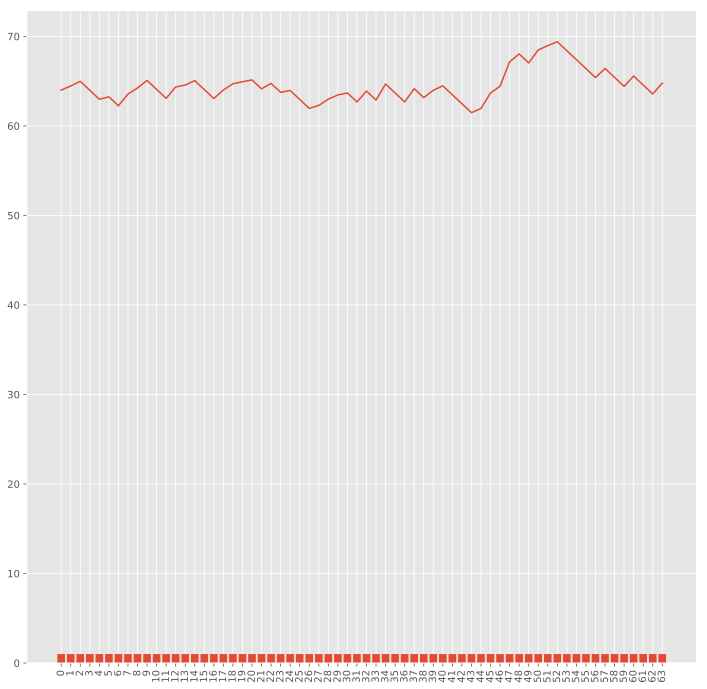

In [19]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
run_unit_strategy(y_pred, y_true, odds, plot=True)

Profit: -0.2455%
Balance:  63.8428755368


63.842875536760857

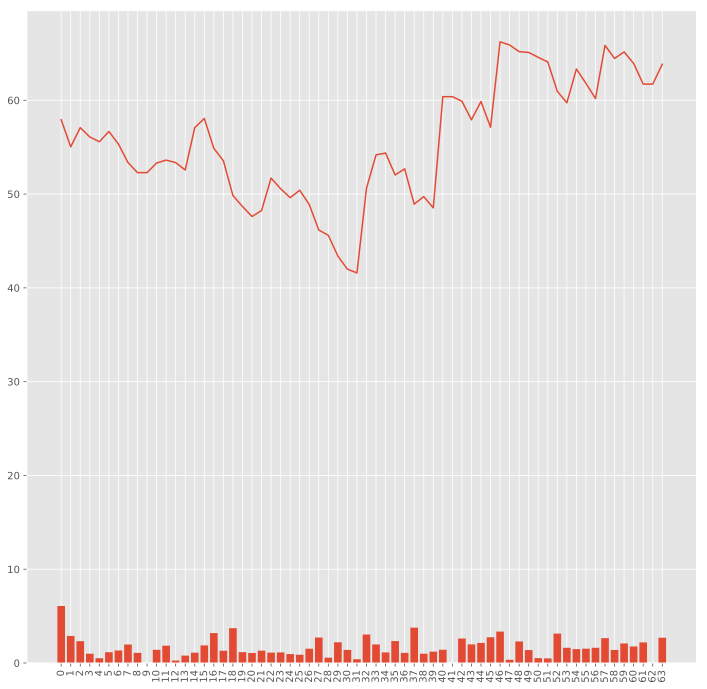

In [20]:
y_pred = tournament_simulation["outcome"].values
y_true = tournament_simulation["true_outcome"].values
odds = match_bets[["1", "X", "2"]].values
probabilities = tournament_simulation[["home_win_prob", "draw_prob", "away_win_prob"]].values
run_kelly_strategy(y_true, odds, probabilities, plot=True, coef=0.3)